In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# configure
pd.set_option('display.max_columns', 500)
# Setting up the visualization environment
sns.set(style='whitegrid')
plt.figure(facecolor='white')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
# Load the CSV file
df = pd.read_csv("Transaction data test.csv")

# Print the contents of the dataframe
df

,TransactionID,CustomerID,Origin_Currency,Currency,CDB_Location_Country_x,CDB_Location_CountryCode,Transaction_Type,Origin_Date,System_Date,Completed_Date,Origin_Amount,Amount,Merchant_Code,Deposit_Withdrawal,Transaction_Text,Transaction_Description_0,Transaction_Description_1,Transaction_Description_2,Transaction_Location,Opposite_party_ID,Opposite_party_Name,Opposite_party_Adress,Opposite_party_City,Opposite_party_Country
0,MQQZ-29877673,46737,NOK,NOK,Norway,NO,Card,2024-02-27,2024-02-27,2024-02-29,8935.25,8935.25,5411,withdrawal,NaN,XQI-6750,Act positive continue.,Series note opportunity people movie.,7819,22944.0,Christina Jenkins,"500 Day Pine\r\nJasmineborough, AS 78974",New Katherineberg,PERU
1,XSSQ-65285409,19620,NOK,NOK,Norway,NO,Cash,2024-03-04,2024-03-04,2024-03-04,1334.99,1334.99,5411,deposit,NaN,EMF-9470,Usually free side system.,Card night order south series couple herself.,0581,NaN,Unknown,NaN,NaN,NaN
2,PSQH-19614741,49617,NOK,NOK,Norway,NO,Unknown,2024-02-11,2024-02-11,2024-02-12,8104.26,8104.26,Unknown,withdrawal,Offer evidence season actually.,EYN-1211,That often current again surface.,NaN,7744,2880306.0,Klarna,"3241 Gray Cliffs\r\nRangelhaven, ND 13709",West Mistyburgh,BANGLADESH
3,OPNS-43816282,19860,GBP,NOK,Norway,NO,Klarna,2024-02-21,2024-02-21,2024-02-23,283.60,3408.29,5411,deposit,Church lawyer onto feeling maybe bill fight.,PLF-7612,Hard special financial stage rather nor.,NaN,Brazil,NaN,Unknown,NaN,NaN,NaN
4,GDJH-85346059,33364,EUR,NOK,Norway,NO,Bank Transfer,2024-03-10,2024-03-10,2024-03-12,265.12,2816.79,5818,deposit,Including control kind full property magazine.,FGY-9987,Ago contain remain board however particular.,NaN,Online,NaN,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,YRFK-80049271,22486,NOK,NOK,Norway,NO,Card,2024-02-22,2024-02-26,2024-02-28,8522.62,8522.62,Unknown,deposit,NaN,IKL-4560,Impact manager result take involve almost foot.,Anyone stuff nothing look however.,4086,NaN,Unknown,NaN,NaN,NaN
99996,KTCJ-50821479,30684,HKD,NOK,Norway,NO,Unknown,2024-03-03,2024-03-03,2024-03-05,4301.00,5451.12,5411,withdrawal,Foot state family drive.,VRQ-5546,Determine address democratic soldier water and.,Fire many see allow prove.,Online,8308103.0,Klarna,842 Acevedo Junctions Apt. 018\r\nWest Catheri...,New Marissa,BURUNDI
99997,IGZI-51148773,32577,NOK,NOK,Norway,NO,Vipps,2024-03-03,2024-03-03,2024-03-03,733663.52,733663.52,5411,withdrawal,Phone treatment hundred form.,FCR-2008,Control book identify whose.,NaN,0604,NaN,Unknown,NaN,NaN,NaN
99998,LXYU-04524272,15594,NOK,NOK,Norway,NO,Card,2024-02-16,2024-02-16,2024-02-17,2056.80,2056.80,Unknown,withdrawal,Tonight crime herself to ahead day.,HRP-6347,There pressure technology safe everybody just ...,Republican bit stop eye paper work tonight.,7409,26875.0,Elizabeth Davidson,"933 Rodriguez Grove\r\nNew Jeffreyview, KS 89054",Dayburgh,ANDORRA


KeyboardInterrupt: 

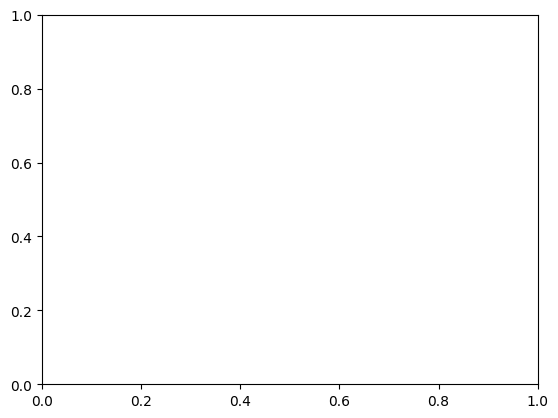

In [5]:
transaction_type_location = df.groupby(['Transaction_Type', 'Transaction_Location']).size().reset_index(name='Count')
transaction_type_location.plot(x='Transaction_Location', y='Count', kind='bar')
plt.xlabel('Transaction Location')
plt.ylabel('Count')
plt.title('Transaction Type by Location')
plt.show()
transaction_type_location


In [ ]:
df.describe()

,CustomerID,Origin_Amount,Amount,Opposite_party_ID
count,100000.000000,1.000000e+05,1.000000e+05,5.200300e+04
mean,34563.750240,4.845992e+05,4.204065e+05,1.781608e+06
std,14333.388352,4.401773e+06,7.754176e+05,2.925600e+06
min,10001.000000,-4.860000e+00,-7.740000e+00,1.000400e+04
25%,21972.250000,2.701220e+03,3.677800e+03,4.272450e+04
50%,34521.000000,6.713435e+03,7.083085e+03,7.569900e+04
75%,46919.000000,2.702032e+05,5.916895e+05,2.900922e+06
max,59815.000000,4.400490e+08,4.663272e+06,9.999614e+06


In [ ]:
sum_difference = df['Origin_Amount'].sum() - df['Amount'].sum()
sum_difference

6419268458.770004

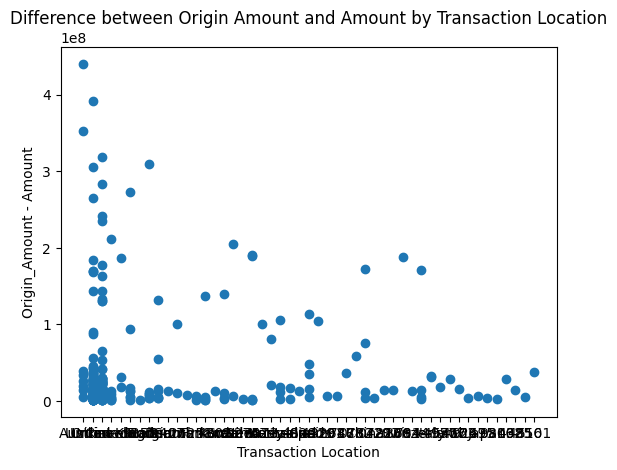

In [ ]:
filtered_amount_difference = df[df['Origin_Amount'] - df['Amount'] > 10**6]
plt.scatter(filtered_amount_difference['Transaction_Location'], filtered_amount_difference['Origin_Amount'] - filtered_amount_difference['Amount'] / 10**6)
plt.xlabel('Transaction Location')
plt.ylabel('Origin_Amount - Amount')
plt.title('Difference between Origin Amount and Amount by Transaction Location')
plt.show()


<BarContainer object of 5126 artists>

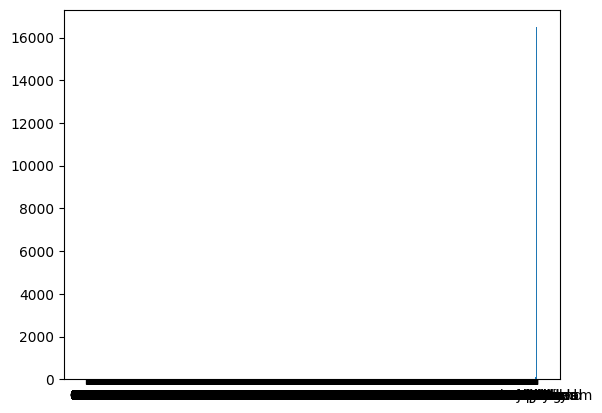

In [6]:
unknown_opposite_party = df[df['Opposite_party_Name'] == 'Unknown']
connection = unknown_opposite_party.groupby('Transaction_Location').size().reset_index(name='Count')
plt.bar(connection['Transaction_Location'], connection['Count'])

In [10]:
# Grouping the data by Origin_Currency and Transaction_Type and counting the occurrences
distribution = df.groupby(['Origin_Currency', 'Transaction_Type']).size().unstack(fill_value=0)

# Resetting index to include Origin_Currency in the dataframe
distribution.reset_index(inplace=True)

# Displaying the updated distribution with Origin_Currency included
distribution

Transaction_Type,Origin_Currency,Bank Transfer,Card,Cash,Crypto,Klarna,PayPal,Unknown,Vipps
0,AUD,31,119,30,17,31,1,29,44
1,BRL,0,0,0,0,0,0,0,1
2,CAD,17,91,20,8,14,3,18,29
3,CHF,78,324,81,34,74,9,80,132
4,CNY,10,41,11,8,10,1,8,28
5,EUR,297,1172,309,155,279,22,296,488
6,GBP,202,798,226,101,183,13,219,267
7,HKD,24,79,23,8,18,4,24,29
8,INR,29,126,31,16,22,4,22,44
9,JPY,37,165,49,19,46,4,40,64


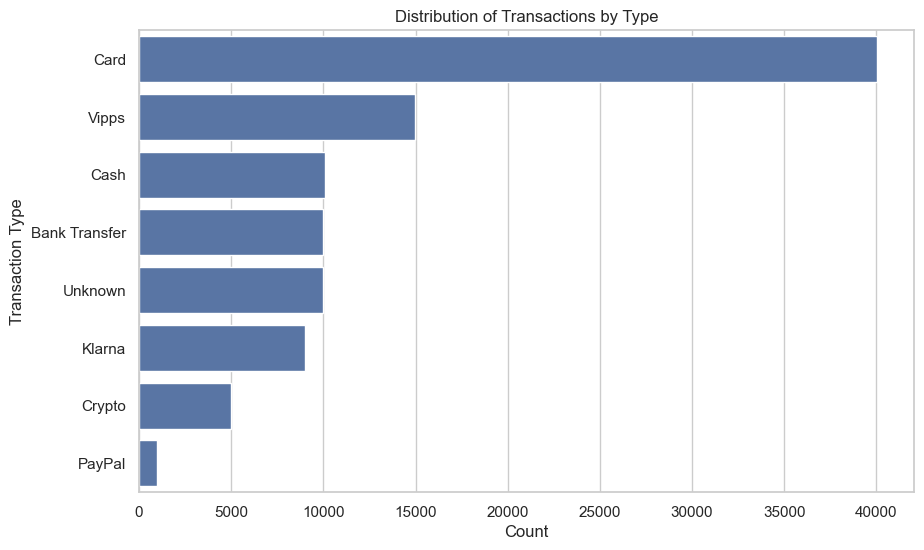

In [14]:
# Distribution of transactions by type
plt.figure(figsize=(10, 6))
sns.countplot(y='Transaction_Type', data=df, order = df['Transaction_Type'].value_counts().index)
plt.title('Distribution of Transactions by Type')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

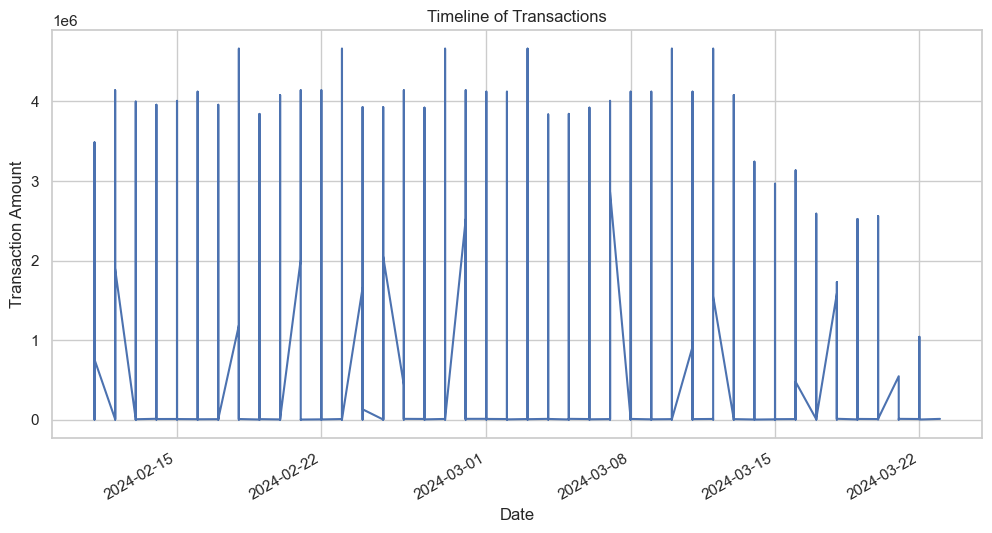

In [13]:
# Timeline of transactions
plt.figure(figsize=(12, 6))
df['Completed_Date'] = pd.to_datetime(df['Completed_Date'])
df.sort_values('Completed_Date', inplace=True)
df.set_index('Completed_Date')['Amount'].plot()
plt.title('Timeline of Transactions')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()